In [96]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

pd.options.mode.chained_assignment = None

import os
os.chdir('../')
from utils import bootsratp
os.chdir('jupyter_notebooks')

In [86]:
df = pd.read_csv('wfh_survey/WFHdata_March22.csv')

In [3]:
# date "YYYYmM - survey wave"
df.date.value_counts(dropna = False)

2022m1     5834
2022m2     5543
2021m12    4533
2021m8     4501
2020m8     4337
2021m7     4276
2022m3     4200
2021m11    4196
2021m6     4191
2021m5     4183
2021m4     4176
2020m12    4097
2021m10    4084
2021m9     4043
2021m1     3939
2020m5     2954
2021m2     2424
2020m11    2330
2020m10    2247
2020m9     2174
2020m7     2140
2021m3     1955
Name: date, dtype: int64

In [4]:
# income "2019 Earnings, $ Thousand"
df.income.value_counts()

#Income seems to be approximated

#incomebin "2019 Earnings, $ Thousand - categorical (coarse), string form"
#Strings of actual income bins lower and upper bound. 
df.incomebin

0         $50k to $100k
1          $20k to $50k
2          $20k to $50k
3        $100k to $150k
4                $150k+
              ...      
82352     $50k to $100k
82353      $20k to $50k
82354      $20k to $50k
82355     $50k to $100k
82356      $20k to $50k
Name: incomebin, Length: 82357, dtype: object

- Income categories (coarse and fine)
- iincomebin 1 "$20k to $50k"
- iincomebin 2 "$50k to $100k"
- iincomebin 3 "$100k to $150k"
- iincomebin 4 "$150k+"

In [5]:
#age_quant "Age in years"
df.age_quant.value_counts()

35    28244
45    20521
57    20000
25    13592
Name: age_quant, dtype: int64

In [6]:
# agebin "Age - categorical bins"
df.agebin.value_counts()

3    28244
4    20521
5    20000
2    13592
Name: agebin, dtype: int64

It seems that age in binned, but I'm not sure about the limits of the bins 

In [7]:
# educ_years "Years of education"
df.educ_years.value_counts()

16    25516
14    20196
18    18304
12    15011
21     2234
10     1096
Name: educ_years, dtype: int64

In [8]:
# education "Education - categorical"
df.education.value_counts() ## It also seems to be binned but not sure what the bins mean

4    25516
3    20196
5    18304
2    15011
6     2234
1     1096
Name: education, dtype: int64

In [9]:
df.education_s.value_counts()

4    25516
5    20538
3    20196
2    15011
1     1096
Name: education_s, dtype: int64

§ Education (there are two similar variables)
education 1 "Less than high-school graduation"
education 2 "High-school graduation"
education 3 "1 to 3-years of college"
education 4 "4 years of college degree"
education 5 "Masters or Professional Degree"
education 6 "PhD"
education 1 "Less than high-school degree"
education 2 "High-school degree"
education 3 "1 to 3-years of college"
education 4 "4-year college degree"
education 5 "Graduate degree"

In [10]:
# wfhcovid "100 x 1(WFH this week, i.e. during COVID)"
df.wfhcovid.value_counts(dropna = False)

0      50246
100    32111
Name: wfhcovid, dtype: int64

In [11]:
# wfhcovid_ever "100 x 1(Ever WFH during COVID)"
df.wfhcovid_ever.value_counts(dropna = False)

100.0    52641
0.0      24622
NaN       5094
Name: wfhcovid_ever, dtype: int64

In [12]:
#income_cat

In [13]:
# work_industry "Industry of current or most recent job"
df.work_industry.value_counts(dropna=False)

6.0     11158
11.0    10869
3.0      8142
5.0      7349
13.0     6109
9.0      5776
4.0      5676
8.0      5531
7.0      4635
17.0     4352
14.0     3396
2.0      1898
1.0      1403
12.0     1328
15.0     1305
18.0     1278
16.0     1100
10.0      557
NaN       495
Name: work_industry, dtype: int64

### Industry of current job
- work_industry 1 "Agriculture",
- work_industry 2 "Arts & Entertainment"
- work_industry 3 "Finance & Insurance"
- work_industry 4 "Construction"
- work_industry 5 "Education"
- work_industry 6 "Health Care & Social Assistance"
- work_industry 7 "Hospitality & Food Services"
- work_industry 8 "Information"
- work_industry 9 "Manufacturing"
- work_industry 10 "Mining"
- work_industry 11 "Professional & Business Services"
- work_industry 12 "Real Estate"
- work_industry 13 "Retail Trade"
- work_industry 14 "Transportation and Warehousing"
work_industry 15 "Utilities"
- work_industry 16 "Wholesale Trade"
- work_industry 17 "Government"
- work_industry 18 "Other"

In [14]:
df.occupation

0        12.0
1        10.0
2         5.0
3        12.0
4         1.0
         ... 
82352     8.0
82353    12.0
82354     6.0
82355     4.0
82356     7.0
Name: occupation, Length: 82357, dtype: float64

In [15]:
df.wfh_able.value_counts(dropna = True)

1.0    2375
5.0     925
2.0     725
3.0     490
4.0     486
Name: wfh_able, dtype: int64

In [16]:
df.wfh_able_equal.value_counts

AttributeError: 'DataFrame' object has no attribute 'wfh_able_equal'

## WFH - Option 

There seems to be three main questions that may help me undertand WFH as an option 


**worksite_option**: Do you currently have the option to work at more than one employer worksite?
- worksite_option 1 "Yes"
- worksite_option 2 "No"

**wfh_able**: Ability to work from home. Note: wfh_able is based on a question asked prior to August
2020. 

- wfh_able 1 "Completely, 100%+ efficient"
- wfh_able 2 "Mostly, 80% to 90% efficient"
- wfh_able 3 "Partly, 50% to 70% efficient"
- wfh_able 4 "Barely, less than 50% efficient"
- wfh_able 5 "No, I cannot do my job at home"

**wfh_able_qual:** wfh_able_qual is based on a question asked from November 2020
- wfh_able_qual 1 "No"
- wfh_able_qual 2 "Yes"

In [17]:
df.worksite_option.value_counts(dropna = False)

NaN    64599
2.0     9376
1.0     8382
Name: worksite_option, dtype: int64

In [18]:
df.wfh_able.value_counts(dropna= False)

NaN    77356
1.0     2375
5.0      925
2.0      725
3.0      490
4.0      486
Name: wfh_able, dtype: int64

In [19]:
df.wfh_able_qual.value_counts(dropna = False)

NaN    61189
2.0    13824
1.0     7344
Name: wfh_able_qual, dtype: int64

In [20]:
df.wfhcovid.value_counts(dropna = False)

0      50246
100    32111
Name: wfhcovid, dtype: int64

The dataset only ahve a few people ansering this question. I wonder why this is the case. For the worksite option and able_qual, there seems to be the same people out. **wfh_able** have more people out. This seems to be a less objective question. 

In [21]:
df['worksite_option_v1'] = df.worksite_option.fillna(-1)
df['wfh_able_qual_v1'] = df.wfh_able_qual.fillna(-1).replace({1 : 'no', 2 : 'yes'})
df['wfhcovid_v1'] = df.wfhcovid.replace({0 : 'no', 100 : 'yes'})
df['person'] = 1
df.groupby(['date','wfh_able_qual_v1', 'wfhcovid_v1'])[['person', 'icratio100']].sum()

person  icratio100
date    wfh_able_qual_v1 wfhcovid_v1                    
2020m10 no               no              587    0.809088
                         yes             104    0.127061
        yes              no              906    1.135101
                         yes             650    0.825772
2020m11 no               no              661    0.895073
                         yes             133    0.174006
        yes              no              649    0.811173
                         yes             887    1.155529
2020m12 no               no             1237    1.838349
                         yes             239    0.324535
        yes              no             1083    1.506396
                         yes            1538    2.074909
2020m5  -1.0             no             1473    2.296291
                         yes            1481    2.208851
2020m7  -1.0             no             1169    1.450088
                         yes             971    1.104027
2020m8  -1.0             no             2534    3.603326
                         yes            1803    2.229170
2020m9  -1.0             no             1385    1.718155
                         yes             789    1.029879
2021m1  no               no             1138    1.781784
                         yes             225    0.323126
        yes              no             1058    1.493529
                         yes            1518    2.078022
2021m10 -1.0             no             2524    2.834185
                         yes            1560    1.742422
2021m11 -1.0             no             2536    3.156354
                         yes            1660    2.123878
2021m12 -1.0             no             2755    3.471771
                         yes            1778    2.087311
2021m2  no               no              738    1.180780
                         yes             117    0.147349
        yes              no              888    1.184517
                         yes             681    0.881502
2021m3  no               no              547    0.853622
                         yes              90    0.111697
        yes              no              569    0.726801
                         yes             749    0.938324
2021m4  no               no             1305    1.764783
                         yes             223    0.279719
        yes              no             1104    1.411771
                         yes            1544    1.966335
2021m5  -1.0             no             2579    3.226386
                         yes            1604    2.075141
2021m6  -1.0             no             2622    3.109815
                         yes            1569    1.870488
2021m7  -1.0             no             2683    3.243535
                         yes            1593    2.081554
2021m8  -1.0             no             2886    3.191148
                         yes            1615    1.802930
2021m9  -1.0             no             2498    2.822288
                         yes            1545    1.625607
2022m1  -1.0             no             3796    2.338612
                         yes            2038    1.218007
2022m2  -1.0             no             3662    4.244047
                         yes            1881    2.228001
2022m3  -1.0             no             2674    3.175022
                         yes            1526    1.891055

It seems like work form home "ability" is only asked in certain surveys waves, not in all of them. 

# Initial Filters

- Only pacific region 
- Don't use Sept2020 to March 2021 because there is a missing category. Likely to reduce "other" category 

In [22]:
total_obs = len(df)
df_0 = df[df.censusdivision== 9]
obs_0 = len(df_0)
print(" Only Pacific Census Division: {} ({:.2f}% of total observations)".format(obs_0,100*obs_0/total_obs))

 Only Pacific Census Division: 13870 (16.84% of total observations)


In [24]:
#Eliminating Sept 2020 to March 2021 because they did not include an important job sector variables.
to_drop_dates = ['2020m9','2020m10','2020m11','2020m12','2021m1','2021m2','2021m3']
df_1 = df_0[~df_0['date'].isin(to_drop_dates)]

obs_1 = len(df_1)

# percentage_dropped = (dropped_observations/obs)*100

print("Observations after dropping 09/20 - 03/21: {} ({:.2f}%)".format(obs_1,100*obs_1/obs_0))

Observations after dropping 09/20 - 03/21: 10615 (76.53%)


## WFH Option - Future 

This seems to be a better qusetion to define what might happen in the future. 

wfh_days_postCOVID_boss_ty "After COVID, in 2022 and later, how many days a week will
that typical employee work on business premises? - categorical"
§ wfh_days_postCOVID_boss_ty_ss "After COVID, in 2022 and later, how many days a week
will that typical employee work on business premises? - caterogical bundling together rarely
and never"

Employer planned post-COVID working from home days.

1. wfh_days_postCOVID_boss "Employer's planned number of paid WFH days after COVID - categorical"
- wfh_days_postCOVID_boss 1 "Never"
- wfh_days_postCOVID_boss 2 "Rarely"
- wfh_days_postCOVID_boss 3 "1 day per week"
- wfh_days_postCOVID_boss 4 "2 days per week"
- wfh_days_postCOVID_boss 5 "3 days per week"
- wfh_days_postCOVID_boss 6 "4 days per week"
- wfh_days_postCOVID_boss 7 "5 day per week"
- wfh_days_postCOVID_boss 8 "No clear plans from employer"
- wfh_days_postCOVID_boss 9 "No employer"

2. wfh_days_postCOVID_boss_ss "Employer's planned number of paid WFH days after COVID – categorical, bundling together rarely and never". Note: The graphs in the paper use wfh_days_postCOVID_boss_ss, our preferred variable, instead of wfh_days_postCOVID_boss
- wfh_days_postCOVID_boss_ss 1 "Rarely or never"
- wfh_days_postCOVID_boss_ss 2 "1 day per week"
- wfh_days_postCOVID_boss_ss 3 "2 days per week"
- wfh_days_postCOVID_boss_ss 4 "3 days per week"
- wfh_days_postCOVID_boss_ss 5 "4 days per week"
- wfh_days_postCOVID_boss_ss 6 "5 day per week"
- wfh_days_postCOVID_boss_ss 7 "No clear plans from employer"
- wfh_days_postCOVID_boss_ss 8 "No employer"

§

Authors of the survey prefer to use "wfh_days_postCOVID_boss_ss". We will use it as well

In [25]:
# df.groupby(['date','wfh_days_postCOVID_boss_ss'])[['person', 'icratio100']].sum()#.tail(50)

In [26]:
# df['wfh_days_postCOVID_boss_ss'].value_counts(dropna = False)

In [29]:
replace_dict = {7:np.nan, 8:np.nan, 3.: 0, 6.: 0,  4.: 0,  5.: 0, 2.: 0 } # 0 is option, 1 is no option

df_1['wfh_not_option'] = df_1['wfh_days_postCOVID_boss_ss'].replace(replace_dict)#.value_counts(dropna=False)
df_2 = df_1.dropna(subset = ['wfh_not_option'])
df_2['wfh_option'] = (~df_2['wfh_not_option'].astype(bool)).astype(int)

In [30]:
df_2

,cratio100,icratio100,cratio100_2021m3,icratio100_2021m3,cratio100_nw,icratio100_nw,date,income,age_quant,agebin,...,freq_nonwork_walk,worktime_nonremoteable_pct,workstatus_current_d,income_year,worksite_option_v1,wfh_able_qual_v1,wfhcovid_v1,person,wfh_not_option,wfh_option
1,0.001410,0.001107,NaN,NaN,0.001370,0.001092,2021m6,45.0,45,4,...,NaN,NaN,NaN,2019,-1.0,-1.0,no,1,1.0,0
2,0.001984,0.000865,NaN,NaN,0.001926,0.000853,2021m11,25.0,35,3,...,NaN,NaN,NaN,2019,1.0,-1.0,no,1,0.0,1
5,0.000587,0.001407,NaN,NaN,0.000570,0.001387,2021m11,137.5,45,4,...,NaN,NaN,NaN,2019,1.0,-1.0,yes,1,0.0,1
6,0.003813,0.002992,NaN,NaN,0.003703,0.002952,2021m9,45.0,45,4,...,NaN,NaN,NaN,2019,-1.0,-1.0,no,1,1.0,0
8,0.000587,0.001407,NaN,NaN,0.000570,0.001387,2021m11,137.5,45,4,...,NaN,NaN,NaN,2019,1.0,-1.0,yes,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80590,0.001715,0.001047,NaN,NaN,0.001666,0.001033,2021m6,35.0,57,5,...,NaN,NaN,NaN,2019,-1.0,-1.0,no,1,1.0,0
80591,0.000707,0.001110,NaN,NaN,0.000686,0.001095,2022m2,90.0,45,4,...,NaN,NaN,NaN,2021,2.0,-1.0,no,1,1.0,0
80593,0.001718,0.001348,0.004778,0.003407,0.001668,0.001330,2020m8,45.0,45,4,...,NaN,NaN,2.0,2019,-1.0,-1.0,yes,1,1.0,0
80594,0.000587,0.001407,NaN,NaN,0.000570,0.001387,2021m11,137.5,45,4,...,NaN,NaN,NaN,2019,2.0,-1.0,yes,1,0.0,1


In [34]:
obs = len(df_2)
pct = 100*obs/len(df_1)
print ("After dropping not employer, or not future plans, we remain with {} observations ({:.2f}%)".format(obs, pct))

After dropping not employer, or not future plans, we remain with 7884 observations (74.27%)


## Job Sector variables

I need to match this to a similar way NHTS does it. 

Occupation >> More likely to be useful for me. 
- (0) occupation 1 "Armed Forces",
- (0) occupation 2 "Construction and Extraction"
- (0) occupation 3 "Farming, Fishing and Forestry"
- (0) occupation 4 "Installation, Maintenance and Repair"
- (1) occupation 5 "Management, Business and Financial"
- (0) occupation 6 "Office and Administrative Support"
- (0) occupation 7 "Production"
- (1) occupation 8 "Professional and related"
- (0) occupation 9 "Sales and related"
- (0) occupation 10 "Service"
- (0) occupation 11 "Transportation and material moving"
- (np.nan) occupation 12 "Other"

NHTS Categories:
- 0: Sales or Service, Clerical or Administrative Support, Manufacturing, Construction, Maintenance or farming
- 1: Professional, Managerial or Technical


## Don't use Sept2020 to March 2021 because there is a missing category. Likely to reduce "other" category

In [49]:
nhts_dict = {1: 0, 2: 0, 3: 0, 4: 0, 
             5: 1, 6: 0, 7: 0, 8: 1, 
             9: 0, 10: 0, 11: 0, 12: np.nan, 13: np.nan}

df_2.occupation.value_counts(dropna = False)
df_2['job_sector'] = df_2.occupation.replace(nhts_dict)#.value_counts(dropna = False)

## FOR NOW - LET'S DROP this categories and let's see re-evaluate if it is worth it to populate the category with people's ansnwers. 
df_3 = df_2.dropna(subset = ['job_sector'])

pct = 100*len(df_3)/len(df_2)
print ('after Dropping "other" job sectors, we remain with {} observations ({:.2f}%)'.format(len(df_3), pct))

after Dropping "other" job sectors, we remain with 6134 observations (77.80%)


In [39]:
df_2.occupation_other.dropna().unique()[:100]

array(['Carpenter ', 'Office management ', 'AUTOMOTIVE', 'Healthcare',
       'Cook', 'Human resources', 'assistant', 'PCA',
       'I make apps and other intellectual properties as well as contract work',
       'it', 'Information technology ', 'Information technology',
       'Computer software', 'It', 'Tour operations ', 'Manager',
       'Employee', 'Software', 'IT', 'IT/Tecnologhy', 'Information on ',
       'information technology', 'Technology ', 'CONSTURACTION',
       'Employees', 'Automotif', 'IT manage', 'Information Technology ',
       'Bangking', 'Food', 'Technology', 'technology', 'Teacher',
       'Insurance', 'Accounting', 'Em', 'technology information', 'Te',
       'Manager ', 'Information yang ', 'School district',
       'Care provider', 'CEO', 'Human Resources', 'delivery', 'Md',
       'Attorney ', 'Information and technology',
       'Information Technology', 'trainer', 'technologu',
       'Telecommunications', 'Technical Program Manager', 'Gas station ',
     

In [76]:
#Income Variable
df_3.income.sort_values().unique()#value_counts(dropna = False)
income_dict = {2:0,  3:0,  4:0,  5:0,  6:0,  7:0,  8:1,  9:1, 10:1, 11:1, 12:2, 13:2, 14:2, 15:np.nan} #Page 19 - Varriable dict - v.april 2022
df_3['income_category'] = df_3.income_cat.replace(income_dict)
df_4 = df_3.dropna(subset = ['income_category'])

pct = 100*len(df_4)/len(df_3)
print ('After dropping missing income, we remain with {} observations ({:.2f}%)'.format(len(df_4), pct))

After dropping missing income, we remain with 6133 observations (99.98%)


In [92]:
#Age variable
age_dict = {25:0, 35:1, 45:1,57:2}
df_4['age_category'] = df.age_quant.replace(age_dict)
df_4.age_category.value_counts()

1    4636
0     844
2     653
Name: age_category, dtype: int64

In [94]:
df_4.groupby(['job_sector','income_category','age_category']).agg({'wfh_option':'mean'})

wfh_option
job_sector income_category age_category            
0.0        0.0             0               0.567430
                           1               0.512225
                           2               0.264085
           1.0             0               0.818182
                           1               0.805858
                           2               0.396825
           2.0             0               0.836735
                           1               0.881902
                           2               0.687500
1.0        0.0             0               0.713115
                           1               0.683099
                           2               0.457143
           1.0             0               0.854369
                           1               0.865290
                           2               0.598131
           2.0             0               0.913043
                           1               0.888060
                           2               0.794118

In [134]:
df_5 = df_4[df_4.date.isin(['2021m10','2021m11','2021m12','2022m1','2022m2','2022m3'])]
a = bootsratp(df_5, 'wfh_option', ['job_sector','income_category','age_category'], func = 'mean')
a

mean  count  lower_bound  \
job_sector income_category age_category                                 
0.0        0.0             0             0.559449    181     0.487480   
                           1             0.544181    435     0.495966   
                           2             0.240708    134     0.165886   
           1.0             0             0.810148     64     0.712382   
                           1             0.835947    622     0.806908   
                           2             0.364863     47     0.227667   
           2.0             0             0.958442     24     0.877630   
                           1             0.914969    376     0.886409   
                           2             0.852071      7     0.561843   
1.0        0.0             0             0.756572     61     0.650743   
                           1             0.712661    149     0.636578   
                           2             0.429745     28     0.244933   
           1.0             0             0.843571     52     0.744536   
                           1             0.878881    589     0.851593   
                           2             0.660838     44     0.524419   
           2.0             0             0.886574      9     0.667169   
                           1             0.904902    403     0.877295   
                           2             0.926987     14     0.781996   

                                         upper_bound  
job_sector income_category age_category               
0.0        0.0             0                0.631418  
                           1                0.592396  
                           2                0.315529  
           1.0             0                0.907914  
                           1                0.864985  
                           2                0.502059  
           2.0             0                1.039253  
                           1                0.943528  
                           2                1.142298  
1.0        0.0             0                0.862401  
                           1                0.788743  
                           2                0.614557  
           1.0             0                0.942606  
                           1                0.906170  
                           2                0.797257  
           2.0             0                1.105978  
                           1                0.932509  
                           2                1.071977

In [136]:
a['mean'].values

array([0.55944865, 0.54418113, 0.24070783, 0.81014812, 0.83594666,
       0.36486326, 0.9584415 , 0.91496858, 0.85207056, 0.75657179,
       0.71266085, 0.42974517, 0.8435708 , 0.87888144, 0.66083816,
       0.88657353, 0.90490189, 0.92698655])

## WFH - Weekly frequencies

2. wfh_days_postCOVID_boss_ss "Employer's planned number of paid WFH days after COVID – categorical, bundling together rarely and never". Note: The graphs in the paper use wfh_days_postCOVID_boss_ss, our preferred variable, instead of wfh_days_postCOVID_boss
- wfh_days_postCOVID_boss_ss 1 "Rarely or never"
- wfh_days_postCOVID_boss_ss 2 "1 day per week"
- wfh_days_postCOVID_boss_ss 3 "2 days per week"
- wfh_days_postCOVID_boss_ss 4 "3 days per week"
- wfh_days_postCOVID_boss_ss 5 "4 days per week"
- wfh_days_postCOVID_boss_ss 6 "5 day per week"
- wfh_days_postCOVID_boss_ss 7 "No clear plans from employer"
- wfh_days_postCOVID_boss_ss 8 "No employer"

In [137]:
dict_wfh_days = {1:0, 2:1, 3:2, 4:2, 5:3, 6:3}
df_6 = df_5[df_5.wfh_option != 0]
df_6['wfh_days_postCOVID_boss_ss'].replace(dict_wfh_days).value_counts(normalize = True)

3.0    0.488269
2.0    0.420307
1.0    0.091424
Name: wfh_days_postCOVID_boss_ss, dtype: float64

In [138]:
dict_wfh_days = {1:0, 2:1, 3:2, 4:2, 5:3, 6:3}

df_6['wfh_days_postCOVID_ss'].replace(dict_wfh_days).value_counts(normalize = True)

3    0.476942
2    0.411003
1    0.073220
0    0.038835
Name: wfh_days_postCOVID_ss, dtype: float64

In [117]:
df_4.date.unique()

array(['2021m6', '2021m11', '2021m4', '2021m12', '2022m3', '2021m8',
       '2022m2', '2022m1', '2021m5', '2021m7', '2021m10', '2021m9',
       '2020m7'], dtype=object)

<AxesSubplot:ylabel='Frequency'>

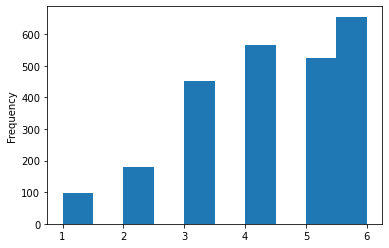

In [128]:
# df_5 = df_4[df_4.date == '2022m1']

df_5[df_5.wfh_option != 0]['wfh_days_postCOVID_ss'].plot.hist()

In [129]:
np.sort(df.date.unique())

array(['2020m10', '2020m11', '2020m12', '2020m5', '2020m7', '2020m8',
       '2020m9', '2021m1', '2021m10', '2021m11', '2021m12', '2021m2',
       '2021m3', '2021m4', '2021m5', '2021m6', '2021m7', '2021m8',
       '2021m9', '2022m1', '2022m2', '2022m3'], dtype=object)